<a href="https://colab.research.google.com/github/FerbeiPatricia/PMP-2024/blob/main/Laborator9_PMP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

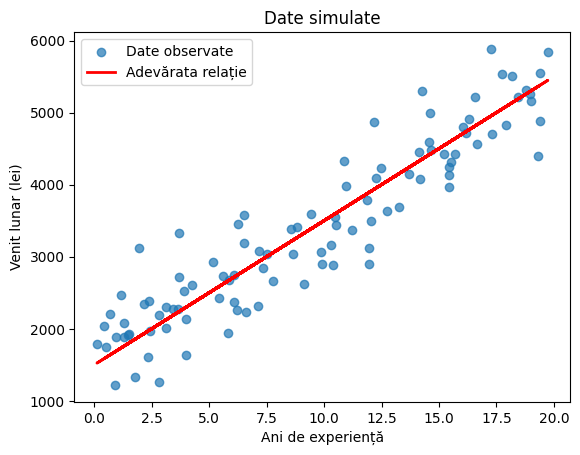

,Experienta,Venit
0,7.490802,3041.684010
1,19.014286,5153.353550
2,14.639879,4473.856156
3,11.973170,2900.849479
4,3.120373,2014.238618


In [2]:
import numpy as np
import pandas as pd
import pymc as pm
import matplotlib.pyplot as plt

# Pasul a) Generarea datelor
np.random.seed(42)

# Parametrii modelului liniar
beta_0 = 1500  # Interceptul
beta_1 = 200   # Creșterea pe an de experiență
sigma = 500    # Deviația standard a zgomotului

# Generăm datele
n_observatii = 100
x = np.random.uniform(0, 20, size=n_observatii)  # Ani de experiență (aleator între 0 și 20)
epsilon = np.random.normal(0, sigma, size=n_observatii)  # Zgomot
y = beta_0 + beta_1 * x + epsilon  # Venitul lunar

# Salvăm datele într-un DataFrame pentru referință
data = pd.DataFrame({"Experienta": x, "Venit": y})

# Vizualizăm datele generate
plt.scatter(x, y, alpha=0.7, label="Date observate")
plt.plot(x, beta_0 + beta_1 * x, color="red", label="Adevărata relație", linewidth=2)
plt.xlabel("Ani de experiență")
plt.ylabel("Venit lunar (lei)")
plt.title("Date simulate")
plt.legend()
plt.show()

data.head()


Output()

Output()

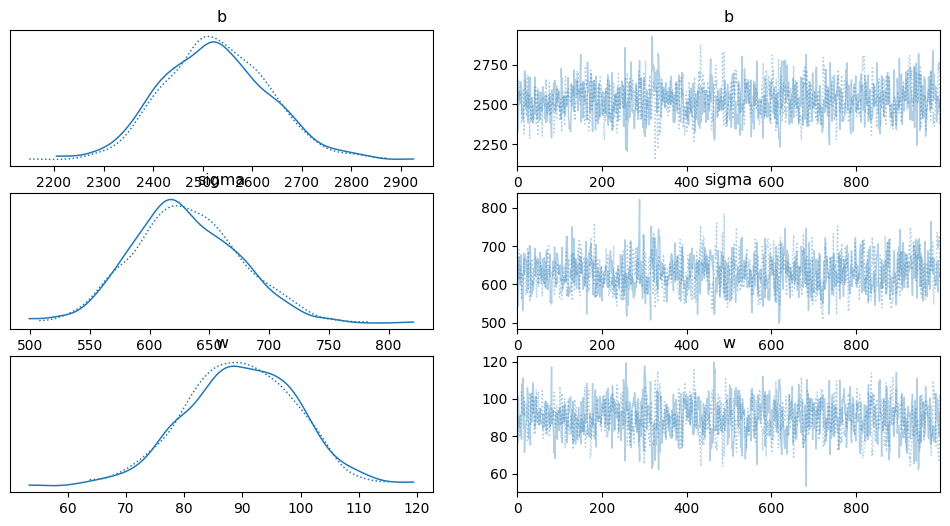

Rezumat posterior:
            mean       sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
b      2526.532  105.732  2321.693   2725.077      3.655    2.594     844.0   
sigma   630.008   44.204   548.849    718.035      1.545    1.093     812.0   
w        89.727    9.371    70.456    106.568      0.332    0.235     803.0   

       ess_tail  r_hat  
b         861.0    1.0  
sigma    1103.0    1.0  
w        1068.0    1.0  
Parametrii reali: w=2.5, b=500, sigma=50


In [6]:
# b) Regresie liniară Bayesiană folosind PyMC
with pm.Model() as model:
    # Priors pentru parametri
    w = pm.Normal("w", mu=0, sigma=10)  # panta
    b = pm.Normal("b", mu=0, sigma=1000)  # intercept
    sigma = pm.HalfNormal("sigma", sigma=100)  # deviația standard a zgomotului

    # Model liniar
    y_pred = w * x + b

    # Likelihhod
    likelihood = pm.Normal("y", mu=y_pred, sigma=sigma, observed=y)

    # Sampling
    trace = pm.sample(1000, return_inferencedata=True)

# Vizualizare rezultate
import arviz as az
az.plot_trace(trace)
plt.show()

# Comparare rezultate estimate cu valorile reale
posterior_summary = az.summary(trace, hdi_prob=0.95)
print("Rezumat posterior:\n", posterior_summary)

print(f"Parametrii reali: w={w_real}, b={b_real}, sigma={sigma_real}")